**Convolution Neural Network using SVM as final layer**

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [4]:
# config=ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction=0.5
# config.gpu_options.allow_growth=True
# session=InteractiveSession(config=config)

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [7]:
training_set=train_datagen.flow_from_directory('Datasets/train',target_size=(64,64),batch_size=32,class_mode='binary')

test_datagen=ImageDataGenerator(rescale=1./255)
testing_set=test_datagen.flow_from_directory('Datasets/test1',target_size=(64,64),batch_size=32,class_mode='binary')

Found 25000 images belonging to 2 classes.
Found 1433 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [9]:
from tensorflow.keras.regularizers import l2

In [10]:
cnn = Sequential()
cnn.add(Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',strides=2,input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
#For regular model
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# for svm model
#As we want to convert into SVM we add kernel_regularizers and regularizers are from rigde and lasso regression
cnn.add(Dense(1,kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#For multiclassification
# cnn.add(Dense(4,kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
# cnn.compile(optimizer='adam',loss='squared_hinge',metrics=['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,545 (1.04 MB)

 Trainable params: 272,545 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#loss='hinge' is loss for SVM
cnn.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])

r=cnn.fit(x=training_set,validation_data=testing_set,epochs=15)

Epoch 1/15


C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 249ms/step - accuracy: 0.5815 - loss: 0.8781 - val_accuracy: 0.6455 - val_loss: 0.6823
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 253ms/step - accuracy: 0.7055 - loss: 0.6286 - val_accuracy: 0.7223 - val_loss: 0.5728
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 253ms/step - accuracy: 0.7441 - loss: 0.5552 - val_accuracy: 0.7613 - val_loss: 0.5566
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 252ms/step - accuracy: 0.7560 - loss: 0.5286 - val_accuracy: 0.7774 - val_loss: 0.5323
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 396s 505ms/step - accuracy: 0.7660 - loss: 0.5068 - val_accuracy: 0.7788 - val_loss: 0.4964
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 145ms/step - accuracy: 0.7762 - loss: 0.4907 - val_accuracy: 0.7830 - val_loss: 0.4779
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 131ms/step - accuracy: 0.7837 - loss: 0.4746 - val_accuracy: 0.7941 - val_loss: 0.4686
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 152s 193ms/step - accuracy: 0.7857 - loss: 0.46

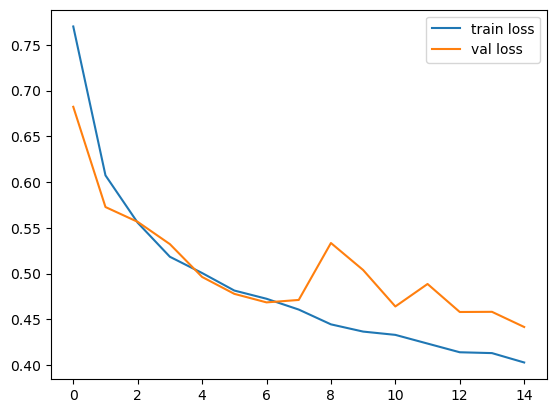

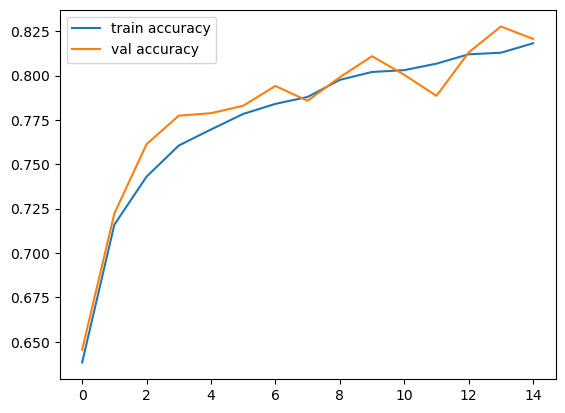

In [28]:
#plot loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
#plot accuracy
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

In [46]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image=image.load_img('Datasets/test1/Dog/2.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=test_image/225
test_image=np.expand_dims(test_image,axis=0)
result1=cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [50]:
result1

array([[2.5476677]], dtype=float32)

In [52]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image=image.load_img('Datasets/test1/Cat/19.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=test_image/225
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [54]:
result

array([[-0.42214534]], dtype=float32)

In [56]:
def cat_or_dog(result):
    if(result>0):
        print('Dog')
    else:
        print('Cat')

In [58]:
cat_or_dog(result1)
cat_or_dog(result)

Dog
Cat
